# Statistics Advanced - 2 | Assignment Answers

Question 1: What is hypothesis testing in statistics?

Answer:
Hypothesis testing is a statistical method used to make decisions or inferences about a population parameter based on sample data. It involves formulating two competing statements: the null hypothesis (H₀) and the alternative hypothesis (H₁). By analyzing the sample, we determine whether there is enough statistical evidence to reject H₀ in favor of H₁. Hypothesis testing is widely used in research, experiments, and decision-making to validate assumptions and claims.


Question 2: What is the null hypothesis, and how does it differ from the alternative hypothesis?

Answer:
The null hypothesis (H₀) is the default assumption that there is no effect or no difference in a population. It represents the status quo. The alternative hypothesis (H₁) is the opposite claim, suggesting that there is a significant effect or difference. For example, in testing whether a new drug works:
- H₀: The drug has no effect.
- H₁: The drug has an effect.
Thus, H₀ is assumed true until evidence from data strongly supports H₁.


Question 3: Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

Answer:
The significance level (α) is the threshold probability used to decide whether to reject the null hypothesis. Common values are 0.05 or 0.01. It represents the maximum risk of making a Type I error (rejecting H₀ when it is true). If the p-value ≤ α, we reject H₀ and accept H₁. If p-value > α, we fail to reject H₀.


Question 4: What are Type I and Type II errors? Give examples of each.

Answer:
- Type I Error (False Positive): Rejecting H₀ when it is actually true.
  Example: Concluding a patient has a disease when they are healthy.

- Type II Error (False Negative): Failing to reject H₀ when H₁ is true.
  Example: Concluding a patient is healthy when they actually have a disease.


Question 5: What is the difference between a Z-test and a T-test? Explain when to use each.

Answer:
- Z-test: Used when population variance is known or the sample size is large (n > 30). It assumes normal distribution.
- T-test: Used when population variance is unknown and the sample size is small (n ≤ 30). It uses the Student’s t-distribution.
In short, Z-test for large samples with known variance, T-test for small samples with unknown variance.


Question 6: Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

Answer:

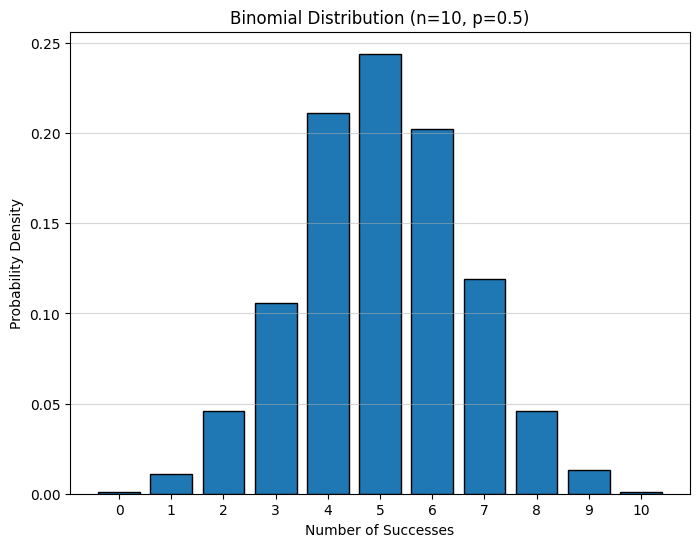

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_trials = 10
p_success = 0.5
size = 1000  # Number of experiments

# Generate binomial distribution
data = np.random.binomial(n=n_trials, p=p_success, size=size)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=np.arange(0, n_trials+2)-0.5,
         edgecolor='black', rwidth=0.8, density=True)
plt.title(f"Binomial Distribution (n={n_trials}, p={p_success})")
plt.xlabel("Number of Successes")
plt.ylabel("Probability Density")
plt.xticks(range(n_trials+1))
plt.grid(axis='y', alpha=0.5)
plt.show()

Question 7: Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.

Answer:

In [4]:
import numpy as np
from scipy import stats

# Sample data provided in the question
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

# Known population parameters
pop_mean = 50
pop_std = 0.5  # Assuming known population standard deviation

# Calculate sample statistics
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)
sample_std = np.std(sample_data, ddof=1)  # Sample standard deviation

# Manual Z-test calculation
z_stat = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))

# Calculate p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("=== Z-TEST RESULTS ===")
print(f"Sample size: {sample_size}")
print(f"Sample mean: {sample_mean:.4f}")
print(f"Population mean: {pop_mean}")
print(f"Population std: {pop_std}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
print(f"\n=== INTERPRETATION (α = {alpha}) ===")
if p_value < alpha:
    print(f"Reject the null hypothesis (H₀)")
    print(f"There is sufficient evidence to conclude that the population mean differs from {pop_mean}")
else:
    print(f"Fail to reject the null hypothesis (H₀)")
    print(f"There is insufficient evidence to conclude that the population mean differs from {pop_mean}")

# Critical values for two-tailed test
z_critical = stats.norm.ppf(1 - alpha/2)
print(f"\nCritical Z-values: ±{z_critical:.3f}")
if abs(z_stat) > z_critical:
    print("Z-statistic falls in the critical region (reject H₀)")
else:
    print("Z-statistic does not fall in the critical region (fail to reject H₀)")

=== Z-TEST RESULTS ===
Sample size: 36
Sample mean: 50.0889
Population mean: 50
Population std: 0.5
Z-statistic: 1.0667
P-value: 0.286122

=== INTERPRETATION (α = 0.05) ===
Fail to reject the null hypothesis (H₀)
There is insufficient evidence to conclude that the population mean differs from 50

Critical Z-values: ±1.960
Z-statistic does not fall in the critical region (fail to reject H₀)


Question 8: Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using
Matplotlib.

Answer:

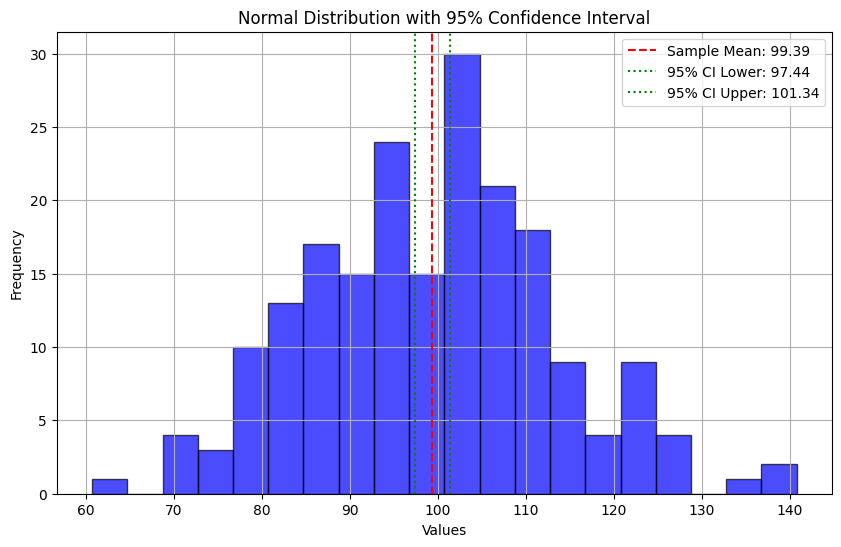

95% Confidence Interval: (97.44, 101.34)


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters for normal distribution
mu, sigma = 100, 15  # mean and standard deviation
sample_size = 200

# Generate random samples
np.random.seed(42)  # for reproducibility
data = np.random.normal(mu, sigma, sample_size)

# Calculate 95% confidence interval
confidence_level = 0.95
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
conf_interval = stats.t.interval(confidence_level, df=sample_size-1,
                                loc=sample_mean, scale=sample_std/np.sqrt(sample_size))

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(conf_interval[0], color='green', linestyle=':', label=f'95% CI Lower: {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='green', linestyle=':', label=f'95% CI Upper: {conf_interval[1]:.2f}')
plt.title('Normal Distribution with 95% Confidence Interval')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

print(f"95% Confidence Interval: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")

Question 9: Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.

Answer:

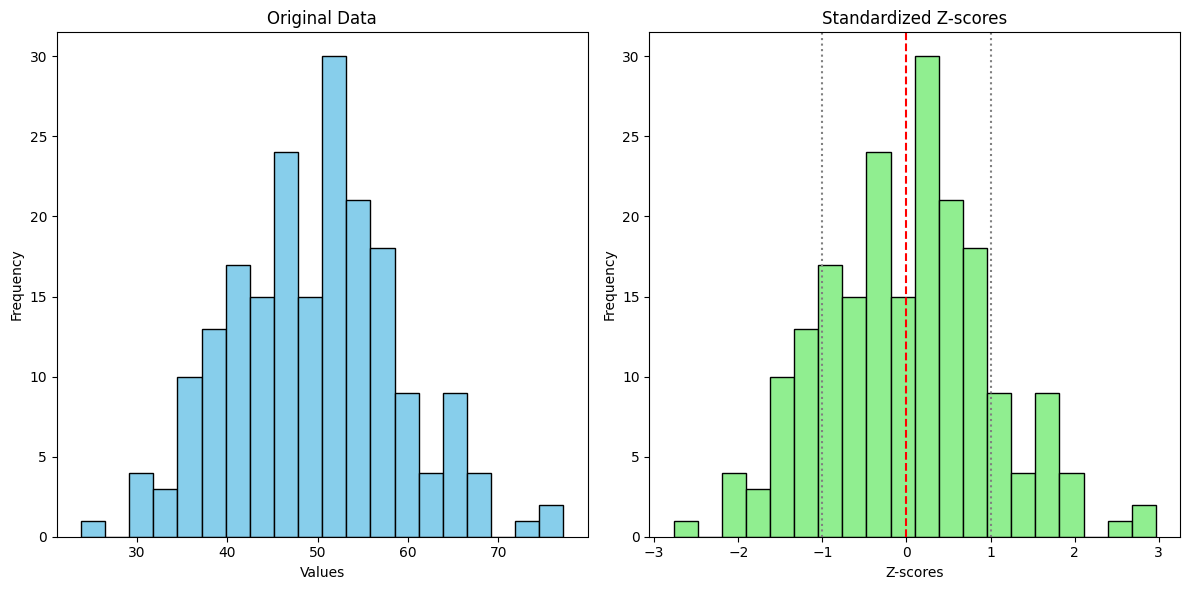

Original Data - Mean: 49.59, Std Dev: 9.31
Z-scores - Mean: 0.00, Std Dev: 1.00


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_z_scores(data):
    """Calculate standardized Z-scores for a dataset"""
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # sample standard deviation
    return (data - mean) / std

# Generate sample data
np.random.seed(42)
original_data = np.random.normal(50, 10, 200)

# Calculate Z-scores
z_scores = calculate_z_scores(original_data)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Original Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Standardized Z-scores')
plt.xlabel('Z-scores')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Mean at 0
plt.axvline(1, color='gray', linestyle=':')  # 1 std dev
plt.axvline(-1, color='gray', linestyle=':') # -1 std dev

plt.tight_layout()
plt.show()

print(f"Original Data - Mean: {np.mean(original_data):.2f}, Std Dev: {np.std(original_data, ddof=1):.2f}")
print(f"Z-scores - Mean: {np.mean(z_scores):.2f}, Std Dev: {np.std(z_scores, ddof=1):.2f}")

Explanation of Z-scores:

A Z-score measures how many standard deviations a data point is from the mean

Z = 0: The value is exactly at the mean

Z = 1: The value is 1 standard deviation above the mean

Z = -1.5: The value is 1.5 standard deviations below the mean

The transformed Z-scores will always have:

Mean = 0

Standard deviation = 1

This standardization allows comparison of data from different distributions

Visualization:
The output shows two histograms side-by-side:

Left: Original data with its natural mean and spread

Right: Standardized data centered at 0 with unit standard deviation